소프트웨어학부 20186663 전찬웅

# code

In [0]:
a=0
b=0
kk1 = []
kkk1 = []
kk2 = []
kkk2 =[]
while(a != 10):
    if np.argmax(A3_test[b][:])==np.argmax(y_test[b][:]):
        kk1.append(np.argmax(A3_test[b][:]))
        kkk1.append(X_test[b][:].tolist())
        a+=1
    b+=1
a=0
b=0
while(a != 10):
    if np.argmax(A3_test[b][:])!=np.argmax(y_test[b][:]):
        kk2.append(np.argmax(A3_test[b][:]))
        kkk2.append(X_test[b][:].tolist())
        a+=1
    b+=1
kkk1 = np.array(kkk1)
kkk2 = np.array(kkk2)

In [0]:
import matplotlib.pyplot as plt
import numpy as np

file_data   = "mnist.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image   = len(data)
count       = 0     # count for the number of images

#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

#
# example of distance function between two vectors x and y
#
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)

#
# make a matrix each column of which represents an images in a vector form
#
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)

for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label[count]       = label
    list_image[:, count]    = im_vector

    count += 1
    
list_label=list_label.tolist()
value = []
for x in range(len(list_label)):
    if list_label[x]==0:
        value.append([1,0,0,0,0,0,0,0,0,0])
    elif list_label[x]==1:
        value.append([0,1,0,0,0,0,0,0,0,0])
    elif list_label[x]==2:
        value.append([0,0,1,0,0,0,0,0,0,0])
    elif list_label[x]==3:
        value.append([0,0,0,1,0,0,0,0,0,0])
    elif list_label[x]==4:
        value.append([0,0,0,0,1,0,0,0,0,0])
    elif list_label[x]==5:
        value.append([0,0,0,0,0,1,0,0,0,0])
    elif list_label[x]==6:
        value.append([0,0,0,0,0,0,1,0,0,0])
    elif list_label[x]==7:
        value.append([0,0,0,0,0,0,0,1,0,0])
    elif list_label[x]==8:
        value.append([0,0,0,0,0,0,0,0,1,0])
    elif list_label[x]==9:
        value.append([0,0,0,0,0,0,0,0,0,1])

list_label= np.array(value)

list_image = list_image.T

X_train = list_image[:1000,:]
X_test = list_image[1000:,:]
y_train = list_label[:1000,:]
y_test = list_label[1000:,:]

theta1 = np.random.randn(784,256)
theta2 = np.random.randn(256,64)
theta3 = np.random.randn(64,10)
bias1 = np.random.randn(1,256)
bias2 = np.random.randn(1,64)
bias3 = np.random.randn(1,10)

# conclusion

# 0 Optimization

In [0]:
learning_rate = 0.01
cost_ = []
cost_test_ = []
accuracy = []
test_accuracy = []
lambd = 2
for i in range(30000):
    a=0
    b=0
    Z1 = np.dot(X_train,theta1)+bias1
    A1 = 1/(1+np.exp(-Z1))
    Z2 = np.dot(A1,theta2)+bias2
    A2 = 1/(1+np.exp(-Z2))
    Z3 = np.dot(A2,theta3)+bias3
    A3 = 1/(1+np.exp(-Z3))
    Z1_test = np.dot(X_test,theta1)
    A1_test = 1/(1+np.exp(-Z1_test))
    Z2_test = np.dot(A1_test,theta2)
    A2_test = 1/(1+np.exp(-Z2_test))
    Z3_test = np.dot(A2_test,theta3)
    A3_test = 1/(1+np.exp(-Z3_test))
    cost = (-y_train*np.log(A3)-(1-y_train)*np.log(1-A3)).sum()/1000+(np.sum(np.square(theta1))+np.sum(np.square(theta2))+np.sum(np.square(theta3)))*lambd/2000
    cost_.append(cost)
    cost_test = (-y_test*np.log(A3_test)-(1-y_test)*np.log(1-A3_test)).sum()/9000
    cost_test_.append(cost_test)
    for j in range(1000):
        if np.argmax(A3[j][:])==np.argmax(y_train[j][:]):
            a+=1.0
    for j in range(9000):
        if np.argmax(A3_test[j][:])==np.argmax(y_test[j][:]):
            b+=1.0
    accuracy.append(a*100/1000)
    test_accuracy.append(b*100/9000)
    dL_dZ3 = A3-y_train                               #(m,10)
    dZ3_dtheta3 = A2                                  #(m,64)
    dZ3_dbias3 = 1                                    #(1,1)
    dZ3_dA2 = theta3                                  #(64,10)
    dA2_dZ2 = 1/(1+np.exp(-Z2))*(1-1/(1+np.exp(-Z2))) #(m,64)
    dZ2_dtheta2 = A1                                  #(m,256)
    dZ2_dbias2 = 1                                    #(1,1)
    dZ2_dA1 = theta2                                  #(256,64)
    dA1_dZ1 = 1/(1+np.exp(-Z1))*(1-1/(1+np.exp(-Z1))) #(m,256)
    dZ1_dtheta1 = X_train                             #(m,784)
    dZ1_dbias1 = 1                                    #(1,1)
    dtheta3 = np.dot(dZ3_dtheta3.T,dL_dZ3)+theta3*lambd/1000
    dbias3 = dL_dZ3
    dtheta2 = np.dot(dZ2_dtheta2.T, dA2_dZ2*np.dot(dL_dZ3,dZ3_dA2.T))+theta2*lambd/1000
    dbias2 = dA2_dZ2*np.dot(dL_dZ3,dZ3_dA2.T)
    dtheta1 = np.dot(dZ1_dtheta1.T, dA1_dZ1*np.dot(dL_dZ3, np.dot(dZ3_dA2.T,dZ2_dA1.T)))+theta1*lambd/1000
    dbias1 = dA1_dZ1*np.dot(dL_dZ3, np.dot(dZ3_dA2.T,dZ2_dA1.T))
    theta3 = theta3-learning_rate*dtheta3/1000
    bias3 = bias3-learning_rate*dbias3/1000
    theta2 = theta2-learning_rate*dtheta2/1000
    bias2 = bias2-learning_rate*dbias2/1000
    theta1 = theta1-learning_rate*dtheta1/1000
    bias1 = bias1-learning_rate*dbias1/1000

# 1 Plot the loss curve

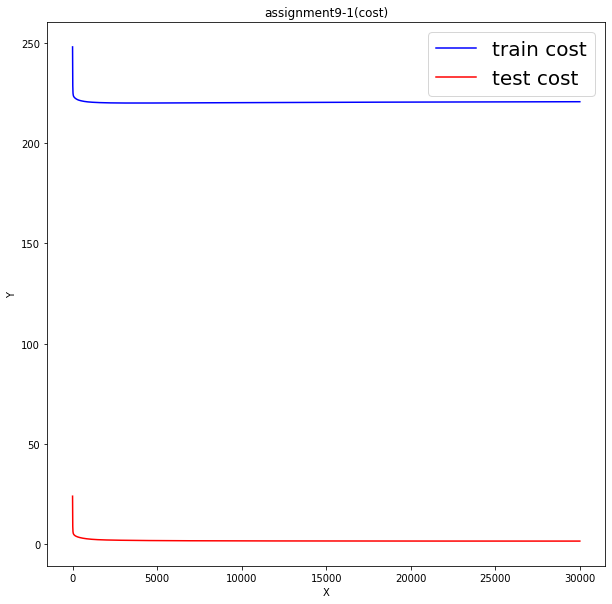

In [28]:
plt.figure(figsize=(10, 10))
plt.title("assignment10-1(cost)")
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(range(30000),cost_,color='b')
plt.plot(range(30000),cost_test_,color='r')
plt.legend(['train cost','test cost'], prop={'size': 20})
plt.show()

# 2 Plot the accuracy curve

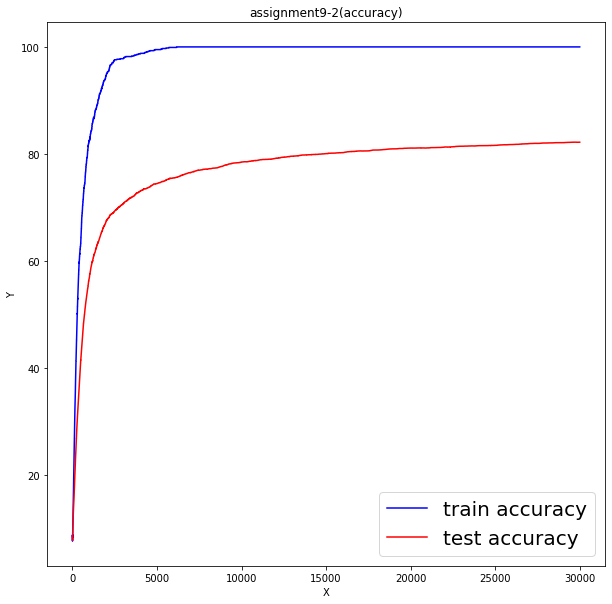

In [29]:
plt.figure(figsize=(10, 10))
plt.title("assignment10-2(accuracy)")
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(range(30000),accuracy,color='b')
plt.plot(range(30000),test_accuracy,color='r')
plt.legend(['train accuracy','test accuracy'], prop={'size': 20})
plt.show()

# 3 Plot the accuracy value

In [30]:
print("train accuracy :",accuracy[29999])
print("test accuracy :",test_accuracy[29999])

train accuracy : 100.0
test accuracy : 82.2


# 4 Plot the classification example

Correctly classified


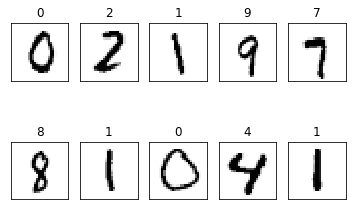

Misclassified


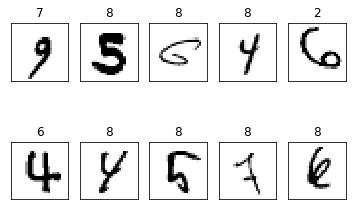

In [32]:
f1 = plt.figure(1)
print("Correctly classified")
for i in range(10):

    label       = kk1[i]
    im_vector   = kkk1[i][:]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(2, 5, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

f2 = plt.figure(2)
print("Misclassified")
for i in range(10):

    label       = kk2[i]
    im_vector   = kkk2[i][:]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(2, 5, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()